In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'CFD.xlsx'

df = pd.read_excel(file_path)

In [ ]:
df['rotating'] = df['rotating'].replace({'co': 0, 'counter': 1})
features = df.drop('torque', axis=1)
target = df['torque']
sc = MinMaxScaler()
X = features
y = target
X_scale = sc.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        ],
       [0.        , 0.        , 0.22222222, 0.        ],
       ...,
       [1.        , 1.        , 1.        , 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.30, random_state = 42,stratify=df.rotating)

[0.948543366768998,
 0.9679686834955537,
 0.9759000312345298,
 0.9753721592954113,
 0.9722597235513879,
 0.9695191216532008,
 0.9652277278875339,
 0.9625479702653914]

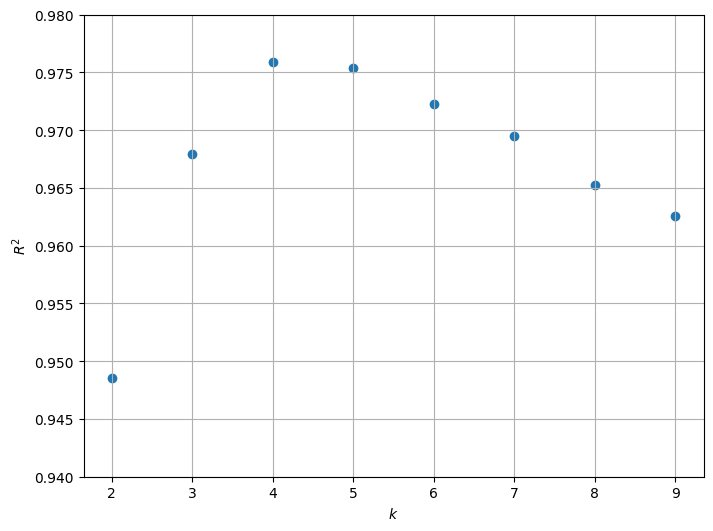

In [ ]:
cv_score=[]
for i in range(2,10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn,X_train,y_train,cv=10, scoring='r2')))
x = range(2,10)
plt.figure(figsize=(8, 6))
plt.scatter(x,cv_score)
plt.ylim(0.94,0.98)
plt.xlabel('$k$')
plt.ylabel('$R^{2}$')

plt.grid(True)
cv_score

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
#knn_reg.fit(X_train,y_train)
#y_pred = knn_reg.predict(X_test)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse,r2

(1.0058131216206459e-07, 0.9685039102644212)

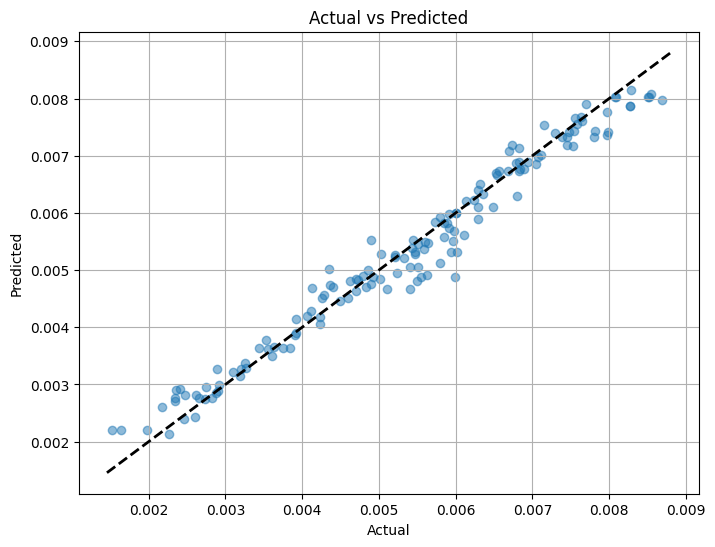

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()